In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [4]:
def graph_classes(x,y):
    fig = plt.figure(figsize=(8,8))
    for n in set(y):
        plt.scatter(x[y==n,0],x[y==n,1])

In [16]:
X, y = make_blobs(n_samples=100, n_features=2,centers=3,random_state=1,cluster_std=2)

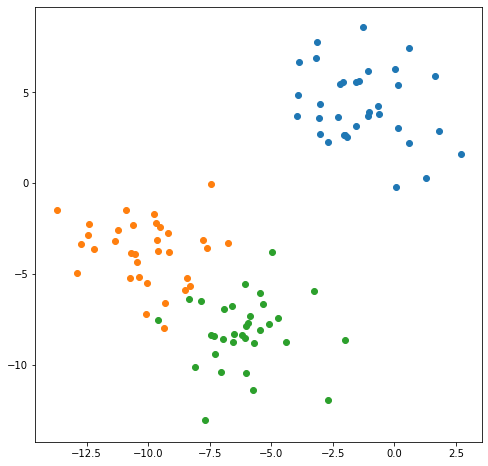

In [17]:
graph_classes(X,y)

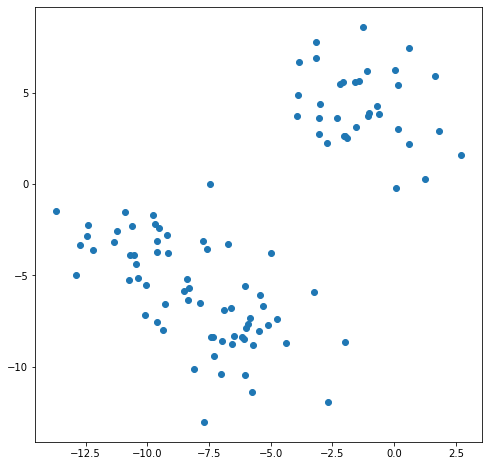

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1])

In [21]:
def generate_random_centroid(X):
    x_range = [min(X[:,0]),max(X[:,0])]
    y_range = [min(X[:,1]),max(X[:,1])]
    
    centroid_x = np.random.uniform(x_range[0],x_range[1],1)[0]
    centroid_y = np.random.uniform(y_range[0],y_range[1],1)[0]
    return (centroid_x, centroid_y)

In [23]:
generate_random_centroid(X)

(-4.075651661464063, -10.157125676686768)

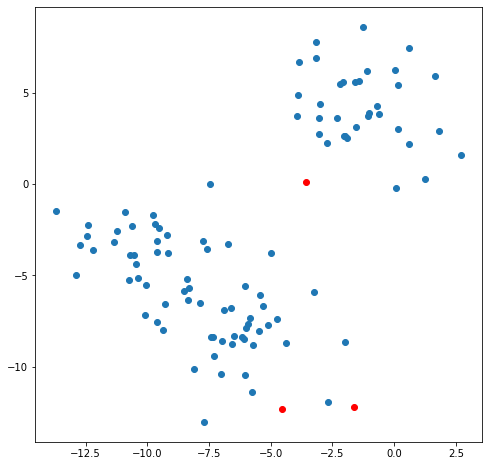

In [31]:
c1 = generate_random_centroid(X)
c2 = generate_random_centroid(X)
c3 = generate_random_centroid(X)

plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1])
plt.scatter(c1[0], c1[1],c='r')
plt.scatter(c2[0], c2[1],c='r')
plt.scatter(c3[0], c3[1],c='r')

In [53]:
def nearest_centroid(point, centroids):
    distances = []
    for centroid in centroids:
        distances.append((point[0]-centroid[0])**2+(point[1]-centroid[1])**2)
    return np.argmin(distances)

def assign_to_centroid(X,centroids):
    assignments = []
    
    for n in range(0,len(X)):
        assignments.append(nearest_centroid(X[n],centroids))
    return np.array(assignments)

In [54]:
centroids = [c1,c2,c3]
assignments = assign_to_centroid(X,centroids)

In [83]:
def plot_with_centroid_assignments(X,centroids):
    colors = ['b','r','g','purple','orange','yellow']
    assignments = assign_to_centroid(X,centroids)
    
    for n in range(0,len(centroids)):
        plt.scatter(X[assignments==n,0],X[assignments==n,1],c=colors[n])
        plt.scatter(centroids[n][0],centroids[n][1], marker='*',edgecolors=colors[n],s=100)

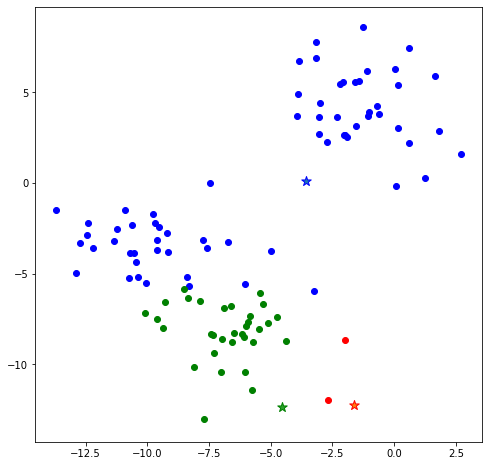

In [84]:
plt.figure(figsize=(8,8))
plot_with_centroid_assignments(X,centroids)

In [91]:
def move_centroids(X,centroids):
    assignments = assign_to_centroid(X,centroids)
    new_centroids = []
    for n in range(0,len(set(assignments))):
        new_centroid_x = np.mean(X[assignments==n,0])
        new_centroid_y = np.mean(X[assignments==n,1])
        new_centroids.append((new_centroid_x,new_centroid_y))
    return new_centroids

In [94]:
centroids_2 = move_centroids(X,centroids)

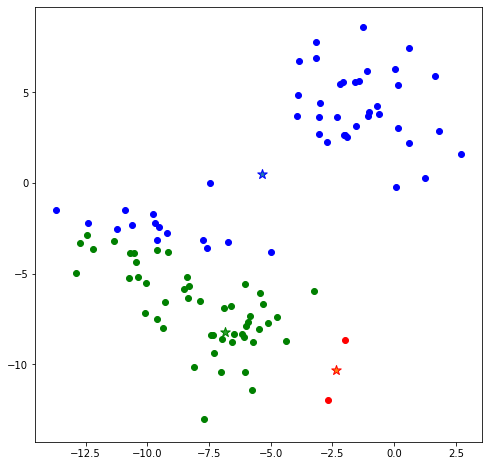

In [95]:
plt.figure(figsize=(8,8))
plot_with_centroid_assignments(X,centroids_2)

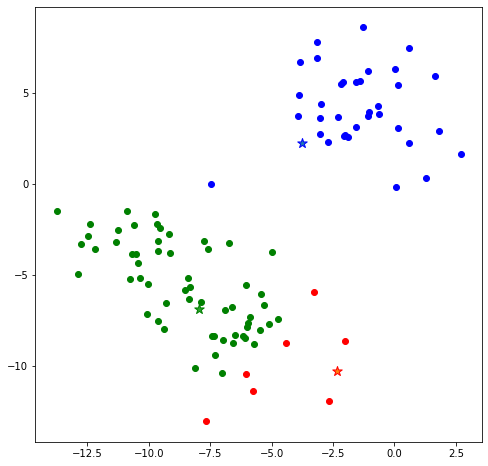

In [96]:
centroids_3 = move_centroids(X,centroids_2)
plt.figure(figsize=(8,8))
plot_with_centroid_assignments(X,centroids_3)

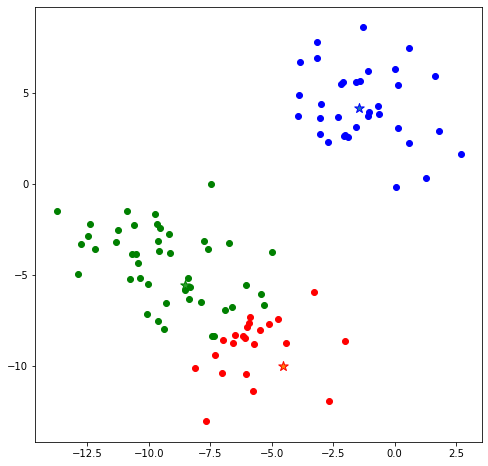

In [97]:
centroids_4 = move_centroids(X,centroids_3)
plt.figure(figsize=(8,8))
plot_with_centroid_assignments(X,centroids_4)

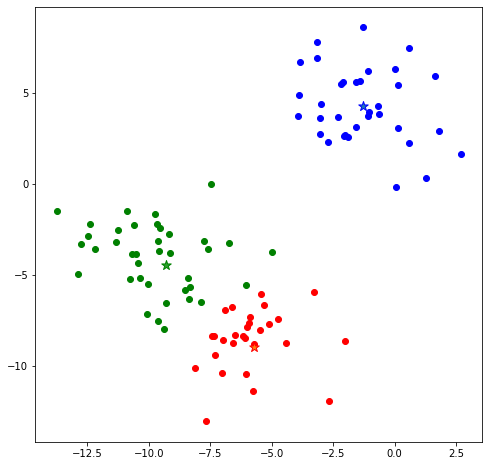

In [98]:
centroids_5 = move_centroids(X,centroids_4)
plt.figure(figsize=(8,8))
plot_with_centroid_assignments(X,centroids_5)

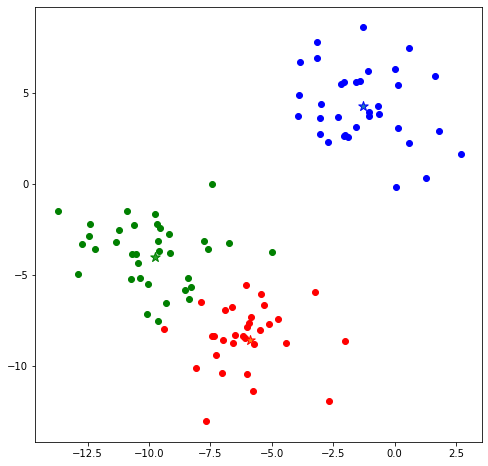

In [99]:
centroids_6 = move_centroids(X,centroids_5)
plt.figure(figsize=(8,8))
plot_with_centroid_assignments(X,centroids_6)

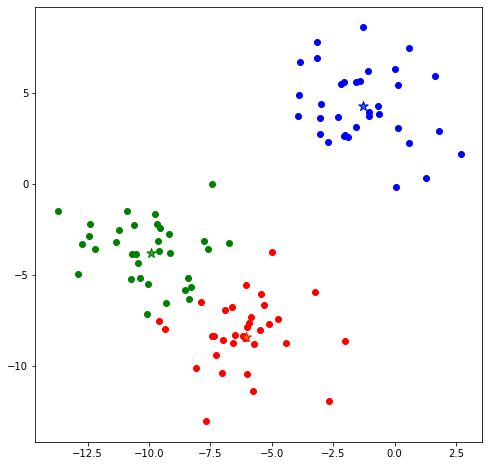

In [100]:
centroids_7 = move_centroids(X,centroids_6)
plt.figure(figsize=(8,8))
plot_with_centroid_assignments(X,centroids_7)
centroids_8 = move_centroids(X,centroids_7)

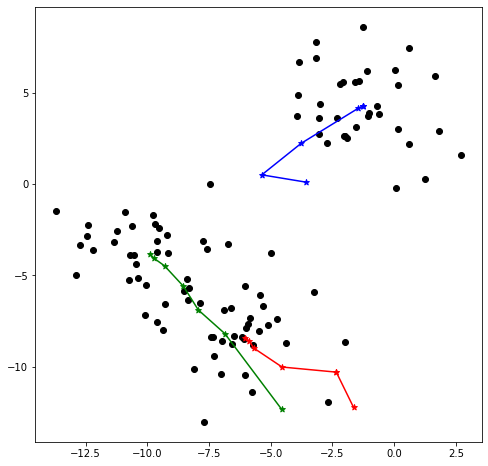

In [109]:
centroid_list = [centroids, centroids_2, centroids_3, centroids_4, centroids_5, centroids_6, centroids_7]
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],c='k')
plt.plot([centroid[0][0] for centroid in centroid_list],[centroid[0][1]for centroid in centroid_list],c='b')
plt.plot([centroid[1][0] for centroid in centroid_list],[centroid[1][1]for centroid in centroid_list],c='r')
plt.plot([centroid[2][0] for centroid in centroid_list],[centroid[2][1]for centroid in centroid_list],c='g')

plt.scatter([centroid[0][0] for centroid in centroid_list],[centroid[0][1]for centroid in centroid_list],c='b'
            ,marker='*')
plt.scatter([centroid[1][0] for centroid in centroid_list],[centroid[1][1]for centroid in centroid_list],c='r'
            ,marker='*')
plt.scatter([centroid[2][0] for centroid in centroid_list],[centroid[2][1]for centroid in centroid_list],c='g'
           ,marker='*')

In [176]:
def k_means_visuals(X,k,n_steps):
    c_0 = []
    for n in range(0,k):
        c_0.append(generate_random_centroid(X))
    
    master_centroids = [c_0]
    
        
    for n in range(0,n_steps):
        new_centroids = move_centroids(X,master_centroids[-1])
        master_centroids.append(new_centroids)
    
    indexes_to_map = [0,2,3,n_steps-1]
    colors = ['b','r','g','purple','orange','yellow','k']
    
    fig, axes = plt.subplots(figsize=(10,10),nrows = 2, ncols=2)
    for n in range(0,4):
        row = n//2
        column = (n)%2
        centroids = master_centroids[indexes_to_map[n]]
        assignments = assign_to_centroid(X,centroids)
        
        ax = axes[row][column]
        for i in range(0,k):
            ax.scatter(X[assignments==i,0],X[assignments==i,1],c=colors[i])
            ax.scatter(centroids[i][0],centroids[i][1], marker='*',edgecolors=colors[i],s=100)
            ax.plot([centroid[i][0] for centroid in master_centroids[:indexes_to_map[n]+1]],
                    [centroid[i][1]for centroid in master_centroids[:indexes_to_map[n]+1]],c=colors[i])
            
        if n == 0:
            ax.set_title('Initial centroid placement')
        elif n==3:
            ax.set_title(f'Final centroid placement')
        else:
            ax.set_title(f'Centroid placement after {indexes_to_map[n]} steps')


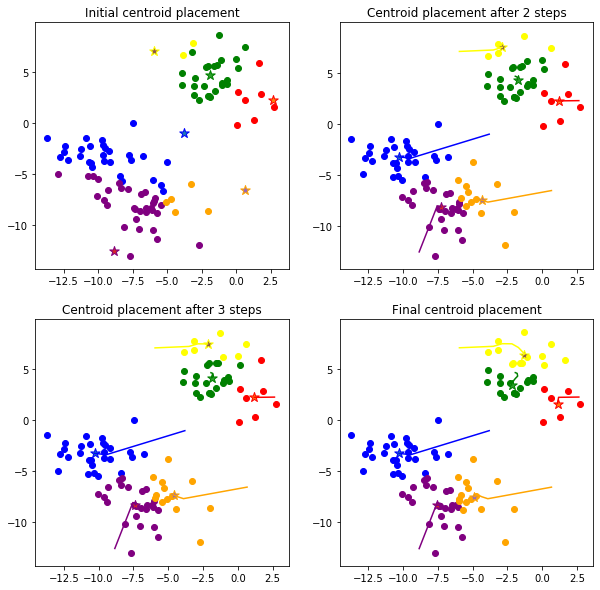

In [177]:
k_means_visuals(X,6,10)

In [185]:
X_2, y_2 = make_blobs(n_samples=100, n_features=2,centers=4,random_state=1,cluster_std=2.5)

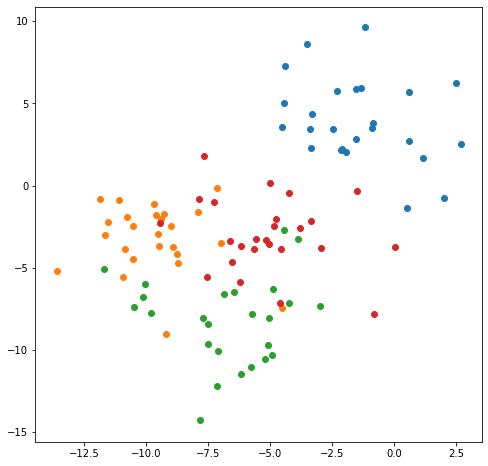

In [186]:
graph_classes(X_2,y_2)

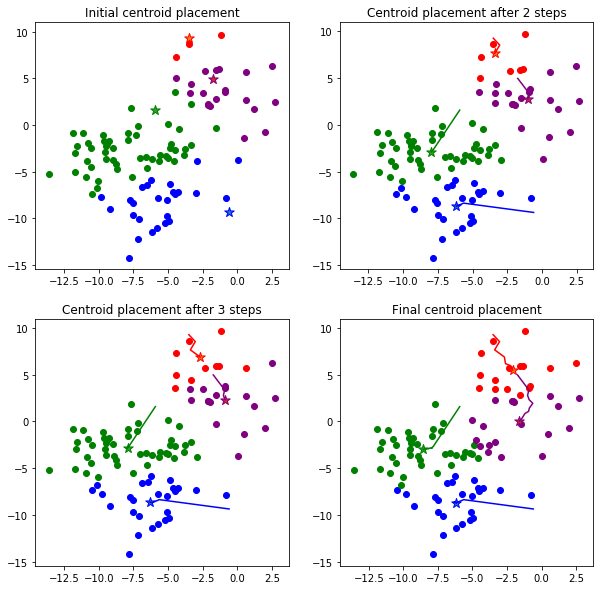

In [187]:
k_means_visuals(X_2,4,10)

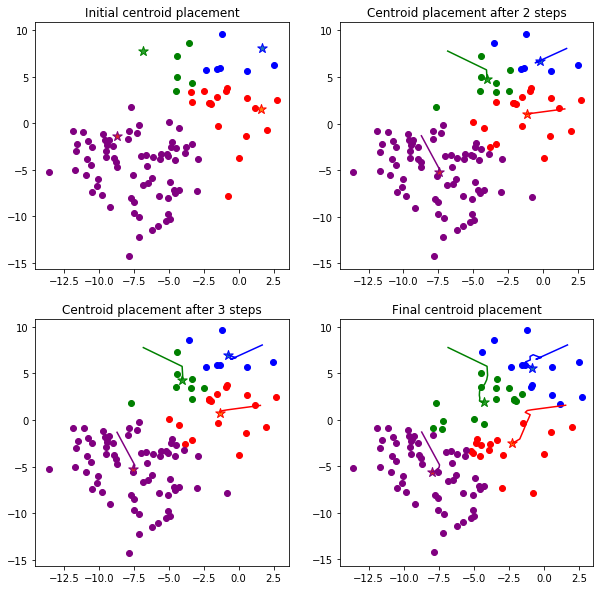

In [190]:
k_means_visuals(X_2,4,12)

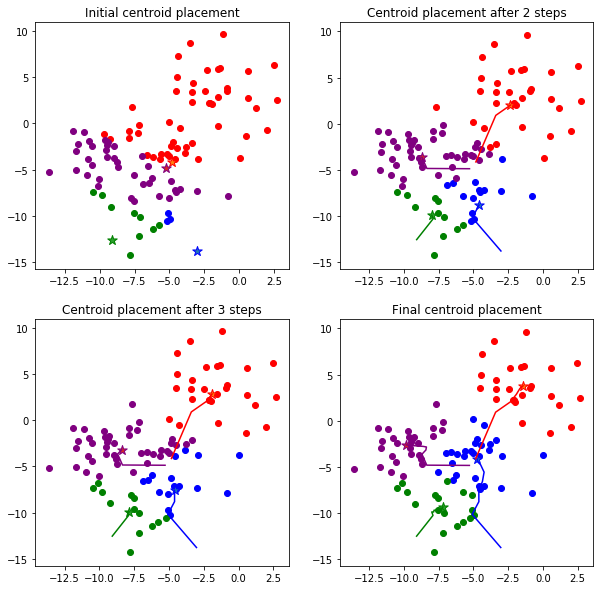

In [188]:
k_means_visuals(X_2,4,10)